# Importing Python Modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

plt.rcParams['figure.figsize'] = (20.0,10.0)

# Importing the Data

In [3]:
data=pd.read_csv("Downloads/headbrain/headbrain.csv", sep=',', header=0)
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


# Assigning Variables to the Data

In [8]:
X = data["Head Size(cm^3)"].values
Y = data["Brain Weight(grams)"].values

In [9]:
mean_x = np.mean(X)
mean_y = np.mean(Y)

m = len(X)

# Calculating the Slope (m) and y-intercept (c) Manually

In [10]:
numer = 0
denom = 0
for i in range(m):
    numer += (X[i]-mean_x)*(Y[i]-mean_y)
    denom += (X[i]-mean_x)**2
#b1 and b0 are for finding m and c
b1 = numer/denom
b0 = mean_y - (b1*mean_x)
print(b1,b0)

0.26342933948939945 325.57342104944223


# Plotting Scatter Plot and Fitting a Regression Line

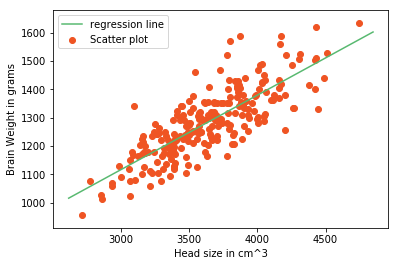

In [14]:
import matplotlib.pyplot as plt
#Plotting values and regression line
max_x = np.max(X)+100
min_x = np.min(X)-100

#Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = b0+b1*x

#Plotting line
plt.plot(x, y, color='#58b970',label= "regression line")

#plotting scatter points
plt.scatter(X, Y, c="#ef5423", label= "Scatter plot")

plt.xlabel("Head size in cm^3")
plt.ylabel("Brain Weight in grams")
plt.legend()
plt.show()

# Calculating the Value of R2

In [15]:
ss_t = 0
ss_r = 0
for i in range(m):
    y_pred = b0+b1*X[i]
    ss_t += (Y[i]-mean_y)**2
    ss_r += (Y[i]-y_pred)**2
r2 = 1-(ss_r/ss_t)
print(r2)

0.6393117199570003


# Linear Regression Algorithm using Scikit-learn

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Cannot use rank 1 matrix in scikit learn
X = X.reshape((m, 1))

reg = LinearRegression()
reg = reg.fit(X,Y)

Y_pred = reg.predict(X)

mse = mean_squared_error(Y, Y_pred)
rmse = np.sqrt(mse)

r2_score = reg.score(X, Y)
print(np.sqrt(mse))
print(r2_score)

72.1206213783709
0.639311719957
